In [96]:
import pandas as pd
import matplotlib.pyplot as plt

import tqdm.notebook as tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

In [97]:
labels = pd.read_feather("./labels_jhoward.fth")
train_metadata = pd.read_feather("./df_trn.fth")

In [98]:
labels = labels[["ID", "any"]]
labels["ID"] = labels["ID"].str[:] + ".png"

In [99]:
labels.head()

,ID,any
0,ID_000039fa0.png,0
1,ID_00005679d.png,0
2,ID_00008ce3c.png,0
3,ID_0000950d7.png,0
4,ID_0000aee4b.png,0


In [100]:
labels.describe()

,any
count,674258.000000
mean,0.144015
std,0.351105
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [101]:
train_metadata.head()

,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,fname,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1
0,ID_231d901c1,CT,ID_b81a287f,ID_dd37ba3adb,ID_15dcd6057a,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,40.0,100.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_231d901c1.dcm,1,-123.101000,104.307000,1,0.0,0.0,0.0,0.984808,-0.173648,1,0.488281,-1024,3263,171.462490,828.102464,0.164074,NaN,NaN,NaN,NaN
1,ID_994bc0470,CT,ID_400facde,ID_c5277f0c63,ID_4ba12c2161,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,12,11,0,47.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_994bc0470.dcm,1,53.628222,223.572015,1,0.0,0.0,0.0,0.933580,-0.358368,1,0.488281,0,2507,430.418091,599.742963,0.198139,1.0,47.0,1.0,80.0
2,ID_127689cce,CT,ID_42910d3d,ID_db93ade25b,ID_c4b4931314,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_127689cce.dcm,1,-123.646240,124.321068,1,0.0,0.0,0.0,0.972370,-0.233445,1,0.488281,-2000,2810,12.801376,1209.046168,0.250923,NaN,NaN,NaN,NaN
3,ID_25457734a,CT,ID_329aafa7,ID_8dd6d32f3b,ID_116558f409,,-114.0,1.0,1,MONOCHROME2,512,512,0.445312,16,12,11,0,36.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_25457734a.dcm,1,-6.000000,171.999939,1,0.0,0.0,0.0,1.000000,0.000000,1,0.445312,0,2647,566.557011,610.152845,0.298386,1.0,36.0,1.0,80.0
4,ID_81c9aa125,CT,ID_6b544c3c,ID_2685c5d5c0,ID_f56d7bd0f9,,-115.0,1.0,1,MONOCHROME2,512,512,0.449219,16,12,11,0,36.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_81c9aa125.dcm,1,-1.000000,230.500000,1,0.0,0.0,0.0,1.000000,0.000000,1,0.449219,4,1570,178.512295,358.235071,0.006176,1.0,36.0,1.0,80.0


In [102]:
train_metadata.sort_values(by=["PatientID", "ImagePositionPatient2"]).head(20)

,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,fname,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1
433520,ID_45785016b,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_45785016b.dcm,1,-122.596,35.968,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2772,-97.885128,1088.926259,0.119938,NaN,NaN,NaN,NaN
315278,ID_37f32aed2,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_37f32aed2.dcm,1,-122.596,38.484,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2722,-84.848293,1102.416573,0.114788,NaN,NaN,NaN,NaN
32788,ID_1b9de2922,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_1b9de2922.dcm,1,-122.596,41.000,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2702,-64.058376,1127.697321,0.095123,NaN,NaN,NaN,NaN
641179,ID_d61a6a7b9,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_d61a6a7b9.dcm,1,-122.596,43.517,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2723,-39.704235,1157.558413,0.088131,NaN,NaN,NaN,NaN
96377,ID_406c82112,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_406c82112.dcm,1,-122.596,46.033,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2728,-35.465805,1161.423391,0.090782,NaN,NaN,NaN,NaN
221690,ID_47beede43,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_47beede43.dcm,1,-122.596,48.549,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,2721,-40.997818,1151.920211,0.109894,NaN,NaN,NaN,NaN
661697,ID_bad62dc58,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_bad62dc58.dcm,1,-122.596,51.065,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,3077,-41.002350,1149.783902,0.123714,NaN,NaN,NaN,NaN
200177,ID_40b991168,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_40b991168.dcm,1,-122.596,53.582,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,3051,-29.811470,1160.511015,0.132061,NaN,NaN,NaN,NaN
205866,ID_00e680819,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_00e680819.dcm,1,-122.596,56.098,1,0.0,0.0,0.0,0.993572,-0.113203,1,0.488281,-2000,3010,-18.547825,1170.079657,0.140919,NaN,NaN,NaN,NaN
289539,ID_54ef737a6,CT,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_54ef73

In [103]:
train_metadata[["SOPInstanceUID", "fname"]].sort_values("SOPInstanceUID")

,SOPInstanceUID,fname
409738,ID_000039fa0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_000039fa0.dcm
470057,ID_00005679d,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_00005679d.dcm
548095,ID_00008ce3c,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_00008ce3c.dcm
204704,ID_0000950d7,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_0000950d7.dcm
291987,ID_0000aee4b,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_0000aee4b.dcm
...,...,...
544908,ID_ffff73ede,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_ffff73ede.dcm
385867,ID_ffff80705,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_ffff80705.dcm
674027,ID_ffff82e46,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_ffff82e46.dcm
52232,ID_ffff922b9,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_ffff922b9.dcm


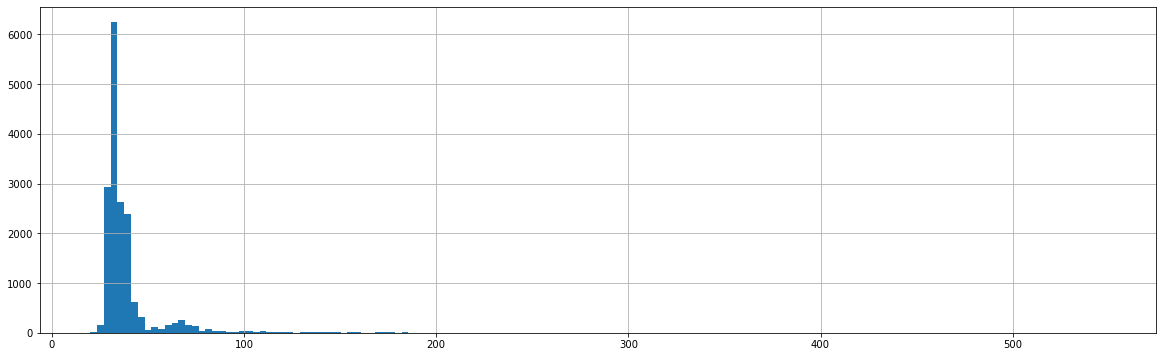

In [104]:
plt.figure(figsize=(20, 6))
train_metadata.groupby("PatientID").Modality.count().hist(bins=150)
plt.show()

# Remove Incorrect Rescale Intercept

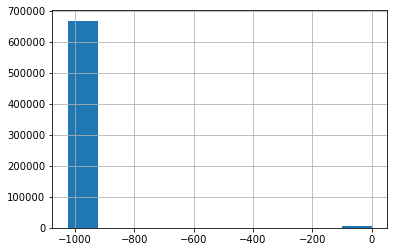

In [105]:
train_metadata.RescaleIntercept.hist()
plt.show()

In [106]:
train_metadata.query("RescaleIntercept!=-1024").groupby("PatientID").count().sort_values("SOPInstanceUID")

,SOPInstanceUID,Modality,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,fname,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_b956c8dd,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
ID_11e103d4,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
ID_03ac0e28,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
ID_57a06f55,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
ID_cd2e1b47,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_a579ac67,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
ID_2b35cfb8,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
ID_00526c11,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


In [107]:
png_IDs_to_remove = sorted(train_metadata.query("RescaleIntercept!=-1024").SOPInstanceUID.tolist())

In [108]:
png_IDs_to_remove[0:10]

['ID_0007ff5d1',
 'ID_000aa2bce',
 'ID_000bd8380',
 'ID_0012b1611',
 'ID_0015e926e',
 'ID_001bdd8fb',
 'ID_001d4ce1c',
 'ID_0023e98ab',
 'ID_0024b1888',
 'ID_00382ea5e']

# Remove files and Write Metadata/Labels

In [109]:
import os
folder_path = "C:/Users/Administrator/Downloads/rsna_stage1_png_128/stage_1_train_images"
for ID in tqdm.tqdm(png_IDs_to_remove):
    os.remove("./rsna_stage1_png_128/stage_1_train_images/{}.png".format(ID))

In [110]:
import glob

In [111]:
os.listdir("./rsna_stage1_png_128/stage_1_train_images")

['ID_000039fa0.png',
 'ID_00005679d.png',
 'ID_00008ce3c.png',
 'ID_0000950d7.png',
 'ID_0000aee4b.png',
 'ID_0000f1657.png',
 'ID_000178e76.png',
 'ID_00019828f.png',
 'ID_0001dcc25.png',
 'ID_0001de0e8.png',
 'ID_0001f7f62.png',
 'ID_0002003a8.png',
 'ID_0002081b6.png',
 'ID_0002108bd.png',
 'ID_000229f2a.png',
 'ID_000230ed7.png',
 'ID_00025ef4b.png',
 'ID_000270f8b.png',
 'ID_00027c277.png',
 'ID_00027cbb1.png',
 'ID_000280440.png',
 'ID_0002a38ad.png',
 'ID_0002a616e.png',
 'ID_0002adc14.png',
 'ID_0002d9086.png',
 'ID_0002e8344.png',
 'ID_00032044c.png',
 'ID_000343150.png',
 'ID_000346ce2.png',
 'ID_00035b650.png',
 'ID_00035f7ac.png',
 'ID_00042829c.png',
 'ID_00042bee4.png',
 'ID_000438d71.png',
 'ID_000447d36.png',
 'ID_000457398.png',
 'ID_00048861b.png',
 'ID_0004a5701.png',
 'ID_0004b4edc.png',
 'ID_0004d2ded.png',
 'ID_000526d81.png',
 'ID_00054ad4d.png',
 'ID_00057f1eb.png',
 'ID_00058bb06.png',
 'ID_00058ff60.png',
 'ID_0005a1d5b.png',
 'ID_0005b88cb.png',
 'ID_0005d340

In [112]:
os.path.isfile("./rsna_stage1_png_128/stage_1_train_images/ID_0007ff5d1.png")

False

In [123]:
labels = labels[~labels["ID"].isin(png_IDs_to_remove)]
train_metadata = train_metadata[~train_metadata["SOPInstanceUID"].isin(png_IDs_to_remove)]

# Remove Low Brain% Images

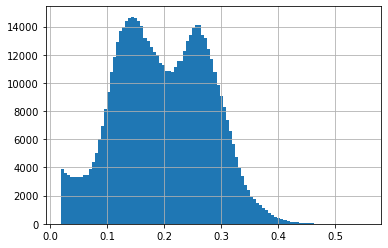

In [126]:
train_metadata.img_pct_window.hist(bins=100)
plt.show()

In [127]:
train_metadata.query("img_pct_window < 0.02").groupby("PatientID").count().sort_values("SOPInstanceUID")

,SOPInstanceUID,Modality,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,fname,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [128]:
img_pct_patient_counts = train_metadata.query("img_pct_window < 0.02").groupby("PatientID").count().SOPInstanceUID.rename("removed")
patient_img_counts = train_metadata.groupby("PatientID").count().SOPInstanceUID.rename("total")

In [129]:
img_pct_comb = pd.concat([img_pct_patient_counts, patient_img_counts], axis=1)

C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [130]:
img_pct_comb.head()

,removed,total
ID_0002cd41,NaN,34
ID_00054f3f,NaN,29
ID_0006d192,NaN,36
ID_00086119,NaN,36
ID_000e5623,NaN,61


In [131]:
img_pct_comb["prop_removed"] = img_pct_comb["removed"]/img_pct_comb["total"]

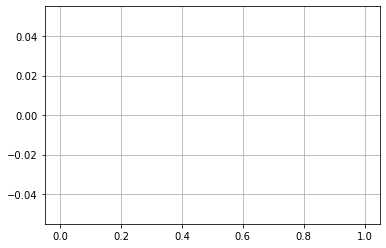

In [132]:
img_pct_comb.prop_removed.hist(bins=20)
plt.show()

In [133]:
png_IDs_to_remove = train_metadata.query("img_pct_window<0.02").SOPInstanceUID.tolist()

In [134]:
for ID in tqdm.tqdm(png_IDs_to_remove):
    os.remove("./rsna_stage1_png_128/stage_1_train_images/{}.png".format(ID))

In [135]:
labels = labels[~labels["ID"].isin(png_IDs_to_remove)]
train_metadata = train_metadata[~train_metadata["SOPInstanceUID"].isin(png_IDs_to_remove)]

# Write out new csvs

In [137]:
labels.to_csv("labels_cleaned.csv")
train_metadata.to_csv("train_metadata_cleaned.csv")

# test?

In [73]:
csv_labels = pd.read_csv("./rsna_stage1_png_128/stage_1_train.csv")
csv_labels = csv_labels.iloc[5::6, :]
csv_labels.head()

,ID,Label
5,ID_63eb1e259_any,0
11,ID_2669954a7_any,0
17,ID_52c9913b1_any,0
23,ID_4e6ff6126_any,0
29,ID_7858edd88_any,0


In [74]:
csv_labels["ID"] = csv_labels["ID"].str.replace("_any", "")
csv_labels.head()

,ID,Label
5,ID_63eb1e259,0
11,ID_2669954a7,0
17,ID_52c9913b1,0
23,ID_4e6ff6126,0
29,ID_7858edd88,0


In [75]:
csv_labels_set = set(csv_labels["ID"].tolist())
labels_set = set(labels["ID"].str.replace(".png", "").tolist())

print(len(csv_labels_set))
print(len(labels_set))

674258
674258


In [76]:
csv_labels_set.symmetric_difference(labels_set)

set()

In [78]:
metadata_labels_set = set(train_metadata["SOPInstanceUID"].tolist())

In [79]:
metadata_labels_set.symmetric_difference(labels_set)

set()

In [95]:
fnames = glob.glob("./rsna_stage1_png_128/stage_1_train_images/*")
fnames = [fname.replace("./rsna_stage1_png_128/stage_1_train_images\\", "").replace(".png", "") for fname in fnames]
print(fnames[0:10])
print(len(fnames))

['ID_000039fa0', 'ID_00005679d', 'ID_00008ce3c', 'ID_0000950d7', 'ID_0000aee4b', 'ID_0000f1657', 'ID_000178e76', 'ID_00019828f', 'ID_0001dcc25', 'ID_0001de0e8']
641386


In [92]:
fnames_set = set(fnames)

In [94]:
len(fnames_set.symmetric_difference(metadata_labels_set))

32872

# Get Slice IDs by Patient

In [139]:
train_metadata.head()

,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,fname,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1
0,ID_231d901c1,CT,ID_b81a287f,ID_dd37ba3adb,ID_15dcd6057a,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,40.0,100.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_231d901c1.dcm,1,-123.101000,104.307000,1,0.0,0.0,0.0,0.984808,-0.173648,1,0.488281,-1024,3263,171.462490,828.102464,0.164074,NaN,NaN,NaN,NaN
1,ID_994bc0470,CT,ID_400facde,ID_c5277f0c63,ID_4ba12c2161,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,12,11,0,47.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_994bc0470.dcm,1,53.628222,223.572015,1,0.0,0.0,0.0,0.933580,-0.358368,1,0.488281,0,2507,430.418091,599.742963,0.198139,1.0,47.0,1.0,80.0
2,ID_127689cce,CT,ID_42910d3d,ID_db93ade25b,ID_c4b4931314,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,16,15,1,30.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_127689cce.dcm,1,-123.646240,124.321068,1,0.0,0.0,0.0,0.972370,-0.233445,1,0.488281,-2000,2810,12.801376,1209.046168,0.250923,NaN,NaN,NaN,NaN
3,ID_25457734a,CT,ID_329aafa7,ID_8dd6d32f3b,ID_116558f409,,-114.0,1.0,1,MONOCHROME2,512,512,0.445312,16,12,11,0,36.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_25457734a.dcm,1,-6.000000,171.999939,1,0.0,0.0,0.0,1.000000,0.000000,1,0.445312,0,2647,566.557011,610.152845,0.298386,1.0,36.0,1.0,80.0
5,ID_87e8b2528,CT,ID_d6e578fb,ID_ef554a40d0,ID_583e0c9d57,,-125.0,1.0,1,MONOCHROME2,512,512,0.488281,16,12,11,0,40.0,80.0,-1024.0,1.0,../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_87e8b2528.dcm,1,-21.516727,156.828114,1,0.0,0.0,0.0,0.996195,-0.087156,1,0.488281,0,2592,464.457344,583.519111,0.248077,1.0,40.0,1.0,80.0


In [141]:
train_metadata_slice_patient_depth = train_metadata[["SOPInstanceUID", "PatientID", "ImagePositionPatient2"]]
train_metadata_slice_patient_depth.head()

,SOPInstanceUID,PatientID,ImagePositionPatient2
0,ID_231d901c1,ID_b81a287f,104.307000
1,ID_994bc0470,ID_400facde,223.572015
2,ID_127689cce,ID_42910d3d,124.321068
3,ID_25457734a,ID_329aafa7,171.999939
5,ID_87e8b2528,ID_d6e578fb,156.828114


In [145]:
patient_slices = dict()
for i, row in tqdm.tqdm(train_metadata_slice_patient_depth.iterrows()):
    if row["PatientID"] not in patient_slices:
        patient_slices[row["PatientID"]] = [(row["ImagePositionPatient2"], row["SOPInstanceUID"])]
    else:
        patient_slices[row["PatientID"]].append((row["ImagePositionPatient2"], row["SOPInstanceUID"]))

In [158]:
patient_slices_sorted = dict()
for i, (key, val) in enumerate(patient_slices.items()):
    val.sort()
    patient_slices_sorted[key] = [ID for depth, ID in val]

In [157]:
patient_slices_sorted["ID_b81a287f"]

['ID_9f601fc5d',
 'ID_19cb96474',
 'ID_496ab2661',
 'ID_06fe4adc5',
 'ID_59bc3960f',
 'ID_aef3564ac',
 'ID_c1f0895bb',
 'ID_c85081ef5',
 'ID_079fef6c2',
 'ID_5ab7d0d9a',
 'ID_54d628968',
 'ID_d3e4638f6',
 'ID_21af3f314',
 'ID_3eb115349',
 'ID_c489f8a64',
 'ID_55e73915f',
 'ID_678a1a095',
 'ID_508bd479e',
 'ID_6609a6357',
 'ID_231d901c1',
 'ID_826c83df4',
 'ID_008507574',
 'ID_f49234b83',
 'ID_ec9041d07',
 'ID_bcbee580c',
 'ID_df700e73f']

In [162]:
train_metadata_slice_patient_depth.query("PatientID == 'ID_b81a287f'").sort_values("ImagePositionPatient2")

,SOPInstanceUID,PatientID,ImagePositionPatient2
214258,ID_9f601fc5d,ID_b81a287f,7.956
427173,ID_19cb96474,ID_b81a287f,13.033
636486,ID_496ab2661,ID_b81a287f,18.110
436756,ID_06fe4adc5,ID_b81a287f,23.187
68576,ID_59bc3960f,ID_b81a287f,28.266
331217,ID_aef3564ac,ID_b81a287f,33.343
503169,ID_c1f0895bb,ID_b81a287f,38.420
467952,ID_c85081ef5,ID_b81a287f,43.497
53879,ID_079fef6c2,ID_b81a287f,48.456
245073,ID_5ab7d0d9a,ID_b81a287f,53.533


In [163]:
import pickle
with open("ordered_slices_by_patient.pkl", "wb") as f:
    pickle.dump(patient_slices_sorted, f)